In [17]:
import numpy as np
from cv2 import cv2
from google.colab.patches import cv2_imshow


In [18]:

#Arithmetic mean filter:
def a_mean(img,kernel_size):
 
    G_mean_img = np.zeros(img.shape)
    #print(G_mean_img[0][0])
 
    #print(img)
    k = int((kernel_size-1)/2)
    #print(k)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if i <k or i>(img.shape[0]-k-1) or j <k or j>(img.shape[1]-k-1):
                G_mean_img[i][j]=img[i][j]
            else:
                for n in range(kernel_size):
                    for m in range(kernel_size):
                        G_mean_img[i][j] +=np.float(1/(kernel_size*kernel_size)*img[i-k+n][j-k+m])
    G_mean_img = np.uint8(G_mean_img)
    return G_mean_img
  


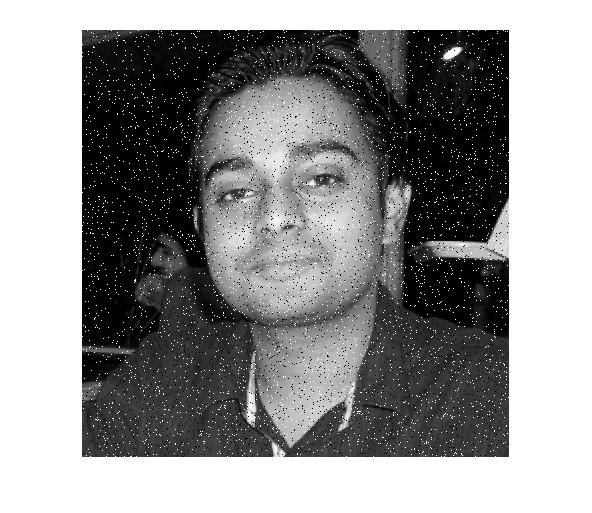

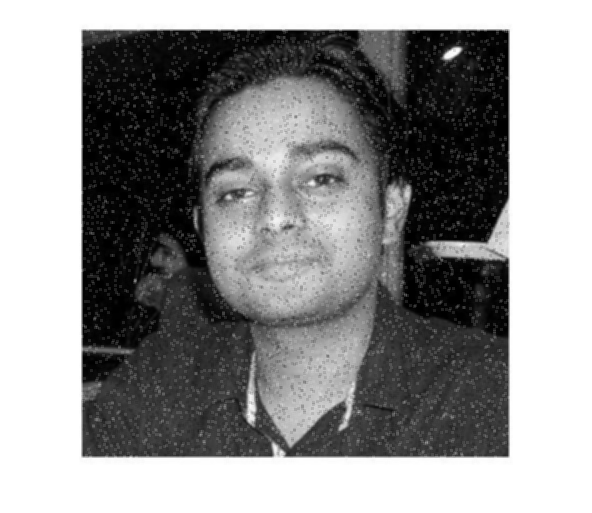

In [20]:
img = cv2.imread("/content/drive/MyDrive/5th sem/image processing/photos/image restoration/noise noise.png",0)
mean_image= a_mean(img,3)
cv2_imshow(img)
cv2_imshow(mean_image)

In [4]:
 #Geometric mean filter:
def G_mean(img,kernel_size):
 
    G_mean_img = np.ones(img.shape)
    #print(G_mean_img[0][0])
 
    #print(img)
    k = int((kernel_size-1)/2)
    #print(k)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if i <k or i>(img.shape[0]-k-1) or j <k or j>(img.shape[1]-k-1):
                G_mean_img[i][j]=img[i][j]
            else:
                for n in range(kernel_size):
                    for m in range(kernel_size):
                        G_mean_img[i][j] *=np.float(img[i-k+n][j-k+m])
                G_mean_img[i][j] = pow(G_mean_img[i][j],1/(kernel_size*kernel_size))
 
 
                #G_mean_img[i][j]=1/9*(img[i-1][j-1]+img[i-1][j]+img[i-1][j+1]+img[i][j-1]+img[i][j]+img[i][j+1]+img[i+1][j-1]+img[i+1][j]+img[i+1][j+1])
    G_mean_img = np.uint8(G_mean_img)
    return G_mean_img


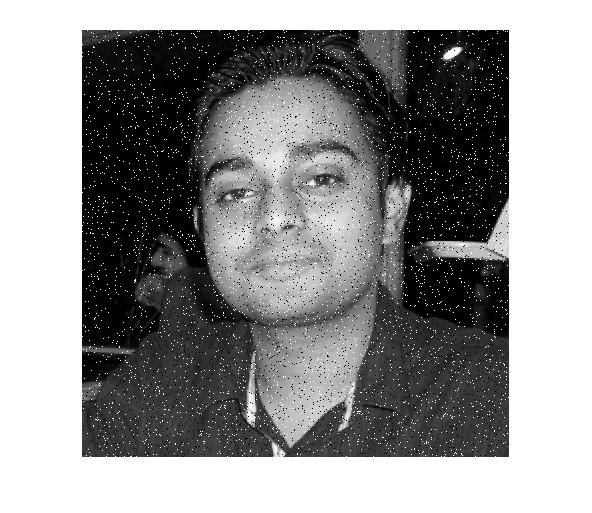

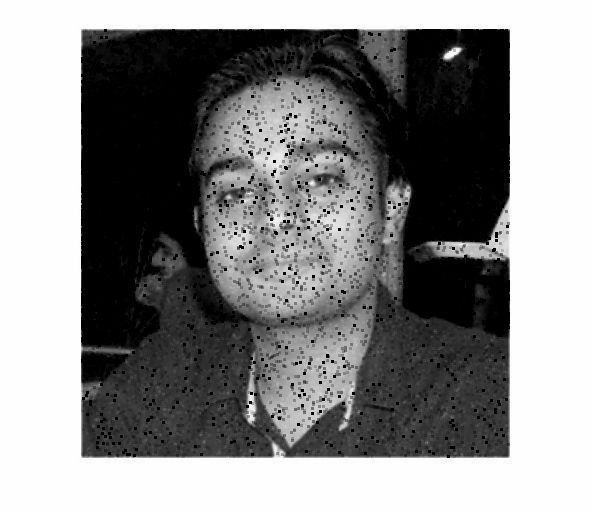

In [21]:
G_image= G_mean(img,3)
cv2_imshow(img)
cv2_imshow(G_image)

In [5]:
 #Harmonic mean filter mean filter:
def H_mean(img,kernel_size):
 
    G_mean_img = np.zeros(img.shape)
    #print(G_mean_img[0][0])
 
    #print(img)
    k = int((kernel_size-1)/2)
    #print(k)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if i <k or i>(img.shape[0]-k-1) or j <k or j>(img.shape[1]-k-1):
                G_mean_img[i][j]=img[i][j]
            else:
                for n in range(kernel_size):
                    for m in range(kernel_size):
                        if img[i-k+n][j-k+m] ==0:
                            G_mean_img[i][j] = 0
                            break
                        else:
                            G_mean_img[i][j] +=1/np.float(img[i-k+n][j-k+m])
                    else:
                        continue
                    break
                if G_mean_img[i][j]!=0:
                    G_mean_img[i][j] = (kernel_size*kernel_size)/G_mean_img[i][j]
 
 
                #G_mean_img[i][j]=1/9*(img[i-1][j-1]+img[i-1][j]+img[i-1][j+1]+img[i][j-1]+img[i][j]+img[i][j+1]+img[i+1][j-1]+img[i+1][j]+img[i+1][j+1])
    G_mean_img = np.uint8(G_mean_img)
    return G_mean_img


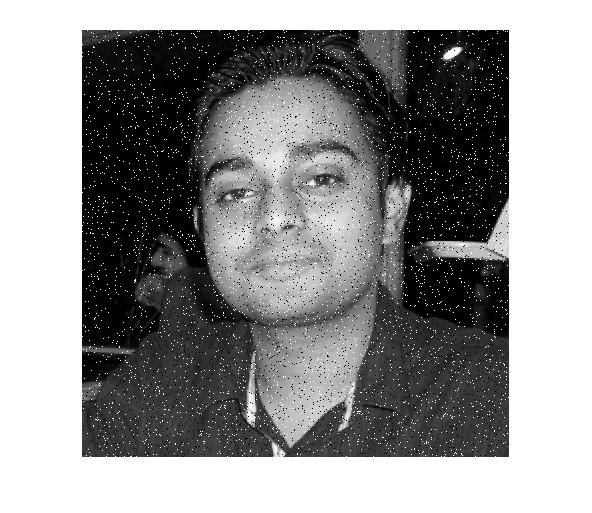

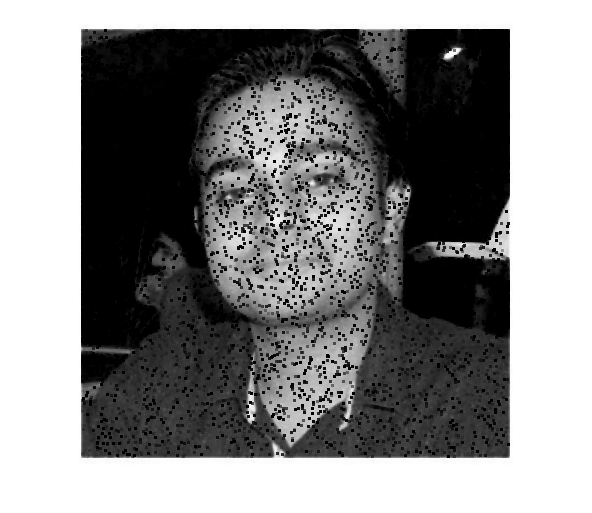

In [24]:
H_image= H_mean(img,3)
cv2_imshow(img)
cv2_imshow(H_image)

In [27]:
#Inverse harmonic mean filter Mean filter:
def HT_mean(img,kernel_size,Q):
 
    G_mean_img = np.zeros(img.shape)
    #print(G_mean_img[0][0])
 
    #print(img)
    k = int((kernel_size-1)/2)
    #print(k)
 
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if i <k or i>(img.shape[0]-k-1) or j <k or j>(img.shape[1]-k-1):
                G_mean_img[i][j]=img[i][j]
            else:
                result_top = 0
                result_down = 0
                for n in range(kernel_size):
                    for m in range(kernel_size):
                        if Q>0:
                            result_top +=pow(np.float(img[i-k+n][j-k+m]),Q+1)
                            result_down +=pow(np.float(img[i-k+n][j-k+m]),Q)
                        else:
                            if img[i-k+n][j-k+m]==0:
                                G_mean_img[i][j] = 0
                                break
                            else:
                                result_top +=pow(np.float(img[i-k+n][j-k+m]),Q+1)
                                result_down +=pow(np.float(img[i-k+n][j-k+m]),Q)
                    else:
                        continue
                    break
 
                else:
                    if result_down !=0:
                        G_mean_img[i][j] = result_top/result_down
 
 
                #G_mean_img[i][j]=1/9*(img[i-1][j-1]+img[i-1][j]+img[i-1][j+1]+img[i][j-1]+img[i][j]+img[i][j+1]+img[i+1][j-1]+img[i+1][j]+img[i+1][j+1])
    G_mean_img = np.uint8(G_mean_img)
    return G_mean_img


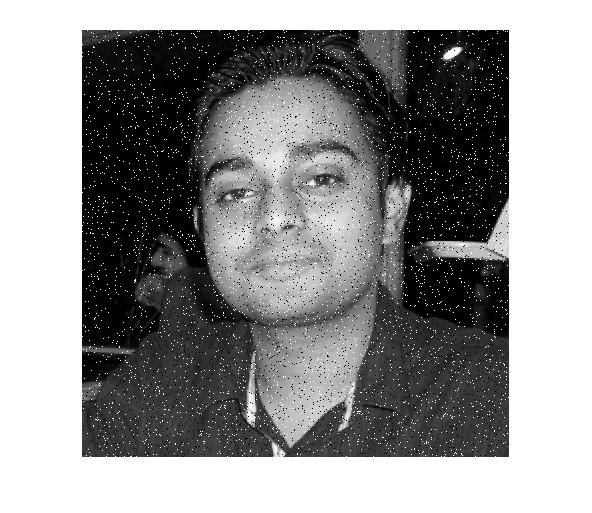

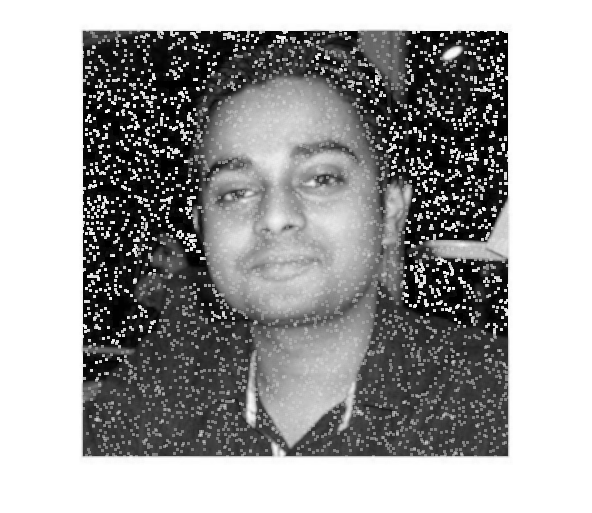

In [32]:
HT_image= HT_mean(img,3,1)
cv2_imshow(img)
cv2_imshow(HT_image)